<a href="https://colab.research.google.com/github/jv-mendes07/premier_league_21-22/blob/main/Premier_League_(21_22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Análise Exploratória da Premier League (2021-2022)

In [2]:
# Importação das bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importação do dataset para a análise:

df = pd.read_csv('/content/drive/MyDrive/soccer21-22.csv')

In [4]:
# Visualização breve das cinco primeiras linhas do dataset:

df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


In [5]:
# Quantidade de linhas e colunas atribuídas à variáveis diferentes:

l, c = df.shape

In [6]:
# Impressão visual da quantidade de linhas e de colunas presentes no dataset:

print(f'Quantidade de Linhas: {l}')
print('\n')
print('Quantidade de Colunas: {0}'.format(c))

Quantidade de Linhas: 380


Quantidade de Colunas: 22


In [7]:
# Informações gerais do conjunto de dados:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   HomeTeam  380 non-null    object
 2   AwayTeam  380 non-null    object
 3   FTHG      380 non-null    int64 
 4   FTAG      380 non-null    int64 
 5   FTR       380 non-null    object
 6   HTHG      380 non-null    int64 
 7   HTAG      380 non-null    int64 
 8   HTR       380 non-null    object
 9   Referee   380 non-null    object
 10  HS        380 non-null    int64 
 11  AS        380 non-null    int64 
 12  HST       380 non-null    int64 
 13  AST       380 non-null    int64 
 14  HF        380 non-null    int64 
 15  AF        380 non-null    int64 
 16  HC        380 non-null    int64 
 17  AC        380 non-null    int64 
 18  HY        380 non-null    int64 
 19  AY        380 non-null    int64 
 20  HR        380 non-null    int64 
 21  AR        380 no

### (1) Tratamento e limpeza dos dados:

In [8]:
# Exclusão de colunas que não são relevantes para a análise:

df.drop(columns = ['HTHG', 'HTAG', 'HTR', 'HST', 'AST'], inplace = True)

In [9]:
# Renomeação das colunas, para termos nomes intuitivamente mais compreensíveis:

df.rename(columns = {
    'FTHG': 'home_goals',
    'FTAG': 'away_goals',
    'FTR': 'result',
    'HS': 'home_shots',
    'AS': 'away_shots',
    'HF': 'home_fouls',
    'AF': 'away_fouls',
    'HC': 'home_corners',
    'AC': 'away_corners',
    'HY': 'home_yellow_cards',
    'AY': 'away_yellow_cards',
    'HR': 'home_red_cards',
    'AR': 'away_red_cards'        
}, inplace = True)

In [10]:
# Reformatação textual do nome das colunas, para que tais nomes estejam somente com letras minúsculas:

df.columns = df.columns.str.lower()

In [11]:
# Verificação de que tal renomeação e formatação textual foram efetivadas:

df.columns

Index(['date', 'hometeam', 'awayteam', 'home_goals', 'away_goals', 'result',
       'referee', 'home_shots', 'away_shots', 'home_fouls', 'away_fouls',
       'home_corners', 'away_corners', 'home_yellow_cards',
       'away_yellow_cards', 'home_red_cards', 'away_red_cards'],
      dtype='object')

In [12]:
# Tipos de dados das colunas:

df.dtypes

date                 object
hometeam             object
awayteam             object
home_goals            int64
away_goals            int64
result               object
referee              object
home_shots            int64
away_shots            int64
home_fouls            int64
away_fouls            int64
home_corners          int64
away_corners          int64
home_yellow_cards     int64
away_yellow_cards     int64
home_red_cards        int64
away_red_cards        int64
dtype: object

In [13]:
# Transformação da coluna 'date' de tipo 'object' para o tipo 'datetime', para que possamos utilizar tal coluna relativo
# às propriedades de data.

df.date = df.date.astype('datetime64[ns]')

### (2) Exploração dos dados:

In [14]:
# Criação de colunas relativas ao total de gols registrados no campeonato e ao acúmulo contínuo de gols por partida durante o campeonato
# inglês:

df = df.assign(total_goals = df['home_goals'] + df['away_goals'],
          acumulative_goals = (df['home_goals'] + df['away_goals']).cumsum())

#### (1) Durante o campeonato inglês de 2021-2022, houve mais registros de vitórias de times mandantes ou visitantes? E qual foi a quantidade de empates contabilizados?

In [15]:
# Verificação de quais são os elementos únicos da coluna 'result':

df.result.unique()

array(['H', 'A', 'D'], dtype=object)

In [16]:
# Verificação da quantidade de vitórias de mandantes ou visitantes e de empates contabilizados:

df.result.value_counts()

H    163
A    129
D     88
Name: result, dtype: int64

In [17]:
# % da quantidade de vitórias de times mandantes ou visitantes, e de empates contábeis durante o campeonato:

(df.result.value_counts(normalize = True) * 100).round(2)

H    42.89
A    33.95
D    23.16
Name: result, dtype: float64

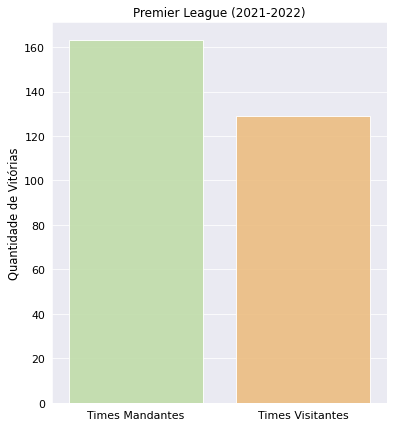

In [18]:
# Gráfico de barras horizontais para vermos comparativamente a quantidade de vitórias dos times mandantes e visitantes:

sns.set_style('darkgrid')
ax = sns.barplot(x = df.result.value_counts().index[:2],
                 y = df.result.value_counts().values[:2],
                 palette = 'Spectral_r',
                 alpha = 0.9)
ax.figure.set_size_inches(6, 7)
ax.set_xticklabels(['Times Mandantes', 'Times Visitantes'], fontsize = 11, color = 'k')
ax.set_yticklabels(list(range(0, 161, 20)), fontsize = 11, color = 'k')
ax.set_title('Premier League (2021-2022)', fontsize = 12, color = 'k')
ax.set_ylabel('Quantidade de Vitórias', fontsize = 11.5, color = 'k')
plt.show()

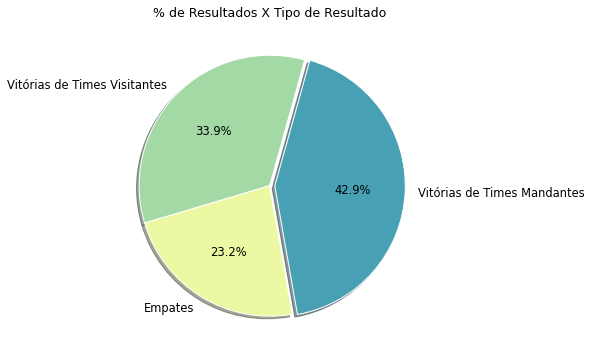

In [19]:
# Gráfico de pizza para visualizarmos comparativamente a proporção de resultados por times de resultados registrados
# nas partidas do campeonato inglês:

plt.figure(figsize = (16, 6))
plt.pie(x = df.result.value_counts(),
        labels = ['Vitórias de Times Mandantes', 'Vitórias de Times Visitantes', 'Empates'],
        autopct = '%1.1f%%', explode = [0.04, 0, 0],
        startangle = 280, textprops = {'fontsize': 11.5,
                                       'color': 'k'},
        shadow = True, colors = sns.color_palette('Spectral_r'))
plt.title('% de Resultados X Tipo de Resultado', fontsize = 12.5, color = 'k');

#### (2) Quais foram os times que mais contabilizaram vitórias durante o campeonato?

In [20]:
# Verificação de quais são os times únicos entre os times mandantes:

df.hometeam.unique()

array(['Brentford', 'Man United', 'Burnley', 'Chelsea', 'Everton',
       'Leicester', 'Watford', 'Norwich', 'Newcastle', 'Tottenham',
       'Liverpool', 'Aston Villa', 'Crystal Palace', 'Leeds', 'Man City',
       'Brighton', 'Southampton', 'Wolves', 'Arsenal', 'West Ham'],
      dtype=object)

In [21]:
# Verificação de quais são os times únicos entre os times visitantes:

df.awayteam.unique()

array(['Arsenal', 'Leeds', 'Brighton', 'Crystal Palace', 'Southampton',
       'Wolves', 'Aston Villa', 'Liverpool', 'West Ham', 'Man City',
       'Burnley', 'Newcastle', 'Brentford', 'Everton', 'Norwich',
       'Watford', 'Man United', 'Tottenham', 'Chelsea', 'Leicester'],
      dtype=object)

In [22]:
# Quantidade de valores únicos da coluna de times mandantes:

df.hometeam.nunique()

20

In [23]:
# Quantidade de valores únicos da coluna de times visitantes:

df.awayteam.nunique()

20

In [24]:
# Verificação de quantas partidas em que houveram vitórias contabilizadas por times mandantes ou visitantes:

df.query('result == "H" | result == "A"').shape[0]

292

In [25]:
# Lista dos vencedores de cada partida:

list_winners = list(np.where(df.query('result == "H" | result == "A"').result == 'H', df.query('result == "H" | result == "A"'
).hometeam, df.query('result == "H" | result == "A"').awayteam))

In [26]:
# Criação de coluna dos times que venceram cada partida:

df.loc[(df['result'] == 'H') | (df['result'] == 'A'), 'winner'] = list_winners

In [27]:
# Agrupamento dos times que mais contabilizaram vitórias no campeonato, organizado em ordem decrescente:

df.groupby('winner').agg({'winner': 'size'}).rename(columns = {'winner': 'qtd'}).sort_values('qtd',
                                                                                            ascending = False)

,qtd
winner,
Man City,29
Liverpool,28
Tottenham,22
Arsenal,22
Chelsea,21
Man United,16
West Ham,16
Wolves,15
Leicester,14


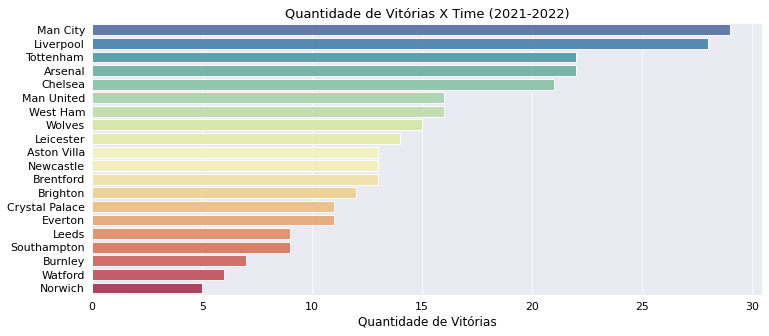

In [28]:
# Gráfico de barras verticais para representar os times que mais contabilizaram vitórias no campeonato inglês:

ax = sns.barplot(data = df.groupby('winner').agg({'winner': 'size'}).rename(columns = {'winner': 'qtd'}).sort_values('qtd',
                                                                                            ascending = False).reset_index(),
                 x = 'qtd', y = 'winner', palette = 'Spectral_r', alpha = 0.9)
ax.set_ylabel('')
ax.set_yticklabels(df.groupby('winner').agg({'winner': 'size'}).rename(columns = {'winner': 'qtd'}).sort_values('qtd',
                      ascending = False).reset_index().winner, fontsize = 11, color = 'k')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Quantidade de Vitórias', fontsize = 12, color = 'k')
ax.set_xticklabels(list(range(0, 31, 5)), fontsize = 11, color = 'k')
ax.set_title('Quantidade de Vitórias X Time (2021-2022)', fontsize = 13, color = 'k')
plt.show()

#### (3) Quais foram os times que mais contabilizaram derrotas durante o campeonato?

In [29]:
# Lista dos times perdedores de cada partida:

list_losers = list(np.where(df.query('result == "H" | result == "A"').result == 'H', df.query('result == "H" | result == "A"'
).awayteam, df.query('result == "H" | result == "A"').hometeam))

In [30]:
# Criação de coluna dos times perdedores de cada partida:

df.loc[(df['result'] == 'H') | (df['result'] == 'A'), 'loser'] = list_losers

In [31]:
# Agrupamento dos times que mais contabilizaram derrotas em ordem decrescente:

df.groupby('loser').size().sort_values(ascending = False)

loser
Watford           27
Norwich           26
Everton           21
Aston Villa       19
Brentford         18
Leeds             18
Wolves            17
Burnley           17
Southampton       16
Newcastle         15
West Ham          14
Leicester         14
Arsenal           13
Man United        12
Crystal Palace    12
Tottenham         11
Brighton          11
Chelsea            6
Man City           3
Liverpool          2
dtype: int64

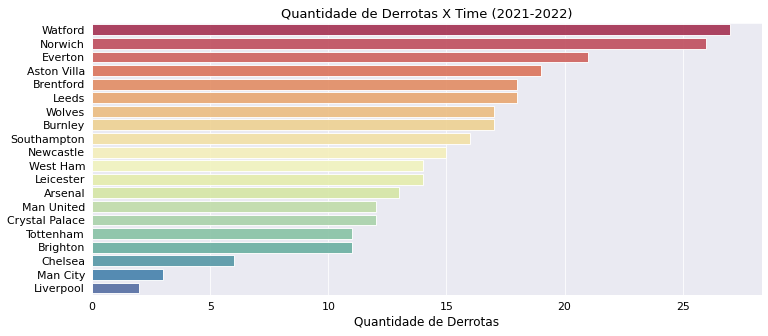

In [32]:
# Gráfico de barras verticais para representar os times que mais contabilizaram vitórias no campeonato inglês:

ax = sns.barplot(x = df.groupby('loser').size(
).sort_values(ascending = False).values, y = df.groupby('loser').size().sort_values(ascending = False).index, palette = 'Spectral', alpha = 0.9)
ax.set_ylabel('')
ax.set_yticklabels(df.groupby('loser').size().sort_values(ascending = False).index, fontsize = 11, color = 'k')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Quantidade de Derrotas', fontsize = 12, color = 'k')
ax.set_xticklabels(list(range(0, 26, 5)), fontsize = 11, color = 'k')
ax.set_title('Quantidade de Derrotas X Time (2021-2022)', fontsize = 13, color = 'k')
plt.show()

#### (4) Quais foram os times com mais empates contabilizados durante o campeonato?

In [33]:
# Times mandantes que mais contabilizaram empates no campeonato inglês, atribuído à uma variável: 

df_hometeam_emp = df[df['winner'].isnull()].groupby('hometeam').agg({'hometeam':'size'}).rename(columns = {'hometeam': 'qtd'}).reset_index().rename(
    columns = {'hometeam': 'time'}
)

In [34]:
# Times visitantes que mais contabilizaram empates no campeonato inglês, atribuído à uma variável: 

df_awayteam_emp = df[df['winner'].isnull()].groupby('awayteam').agg({'awayteam':'size'}).rename(columns = {'awayteam': 'qtd'}).reset_index().rename(
    columns = {'awayteam': 'time'}
)

In [35]:
# Junção entre quantidade de empates de times mandantes e visitantes para termos um dataframe 
# de times que mais contabilizaram empates em ordem decrescente:

df_team_emp = df_hometeam_emp.merge(right = df_awayteam_emp, how = 'inner', on = 'time').assign(qtd = df_hometeam_emp.merge(
    right = df_awayteam_emp, how = 'inner', on = 'time').qtd_x + df_hometeam_emp.merge(
        right = df_awayteam_emp, how = 'inner', on = 'time').qtd_y).drop(columns = ['qtd_x', 'qtd_y']).sort_values(
            'qtd', ascending = False
        )

In [36]:
# Visualização em ordem decrescente dos times que mais contabilizaram empates em ordem decrescente:

df_team_emp

,time,qtd
3,Brighton,15
6,Crystal Palace,15
4,Burnley,14
15,Southampton,13
5,Chelsea,11
8,Leeds,11
13,Newcastle,10
9,Leicester,10
12,Man United,10
10,Liverpool,8


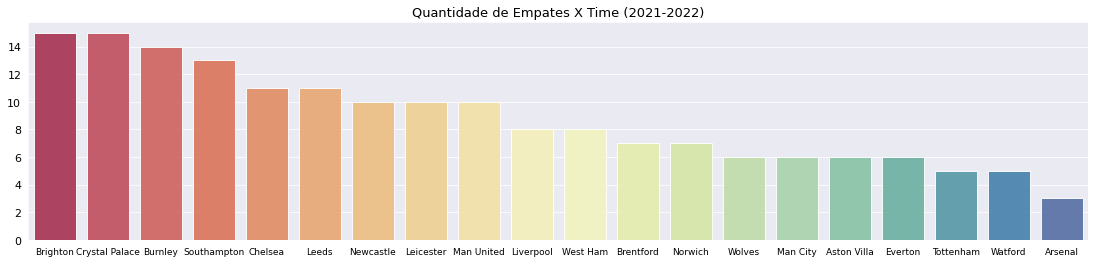

In [80]:
# Gráfico de barras horizontais para visualizarmos a quantidade de empates por cada time em ordem decrescente:

ax = sns.barplot(x = df_team_emp.time, y = df_team_emp.qtd, palette = 'Spectral', alpha = 0.9)
ax.set_xlabel('')
ax.set_xticklabels(df_team_emp.time, fontsize = 9, color = 'k')
ax.figure.set_size_inches(19, 4)
ax.set_ylabel('', fontsize = 12, color = 'k')
ax.set_yticklabels(list(range(0, 15, 2)), fontsize = 11, color = 'k')
ax.set_title('Quantidade de Empates X Time (2021-2022)', fontsize = 13, color = 'k')
plt.show()

#### (5) No campeonato como um todo, houve mais gols marcados por times mandantes ou por times visitantes?

In [38]:
# Visualização da quantidade de gols marcados por times mandantes ou visitantes:

print('Quantidade de Gols Marcados Por Times Mandantes:', df.home_goals.sum())
print('\n')
print('Quantidade de Gols Marcados Por Times Visitantes:', df.away_goals.sum())

Quantidade de Gols Marcados Por Times Mandantes: 575


Quantidade de Gols Marcados Por Times Visitantes: 496


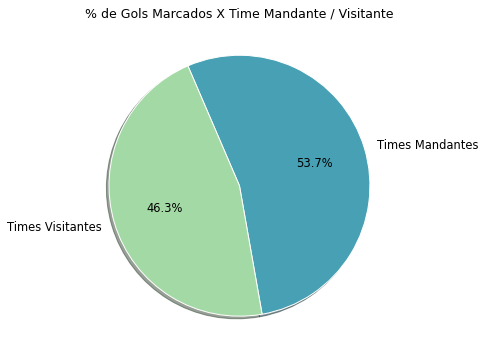

In [39]:
# Gráfico de pizza para vermos percentualmente a quantidade de gols marcados por times mandantes e visitantes
# no campeonato inglês:

plt.figure(figsize = (16, 6))
plt.pie(x = [df.home_goals.sum(), df.away_goals.sum()],
        labels = ['Times Mandantes', 'Times Visitantes'],
        autopct = '%1.1f%%', explode = [0, 0],
        startangle = 280, textprops = {'fontsize': 11.5,
                                       'color': 'k'},
        shadow = True, colors = sns.color_palette('Spectral_r'))
plt.title('% de Gols Marcados X Time Mandante / Visitante', fontsize = 12.5, color = 'k');

#### (6) Qual foi a quantidade de gols marcados por times mandantes e visitantes ao decorrer dos meses? Houve uma tendência de aumento ou de diminuição na quantidade de gols marcados? 

In [40]:
# Quantidade de gols marcados de times mandantes por mês durante o campeonato inglês (2021-2022):

df.groupby(df.date.dt.month).agg({'home_goals': 'sum'})

,home_goals
date,
1,42
2,64
3,30
4,49
5,58
6,16
7,22
8,67
9,37


In [41]:
# Quantidade de gols marcados de times visitantes por mês durante o campeonato inglês (2021-2022):

df.groupby(df.date.dt.month).agg({'away_goals': 'sum'})

,away_goals
date,
1,51
2,57
3,25
4,39
5,48
6,13
7,9
8,41
9,49


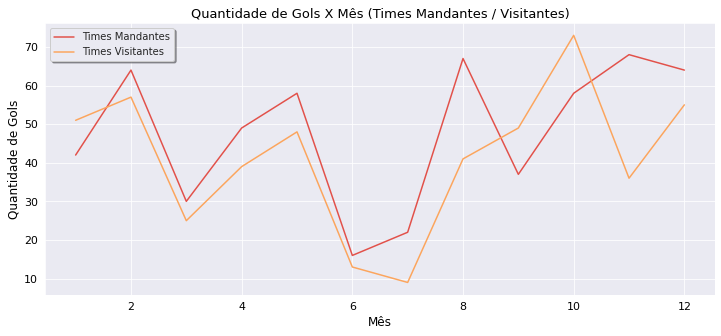

In [42]:
# Gráfico de linhas para compararmos a quantidade de gols marcados por times mandantes e visitantes
# durantes os meses do campeonato inglês:

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 5))
ax1 = sns.lineplot(data = df.groupby(df.date.dt.month).agg({'home_goals': 'sum'}).reset_index(),
                   x = 'date',
                   y = 'home_goals',
                   legend = True,
                   color = sns.color_palette('Spectral')[0])
ax2 = sns.lineplot(data = df.groupby(df.date.dt.month).agg({'away_goals': 'sum'}).reset_index(),
                   x = 'date',
                   y = 'away_goals',
                   legend = True, 
                   color = sns.color_palette('Spectral')[1])
ax1.legend(['Times Mandantes', 'Times Visitantes'], shadow = True)
ax1.set_xlabel('Mês', fontsize = 12, color = 'k')
ax2.set_xticklabels([2, 2, 4, 6, 8, 10, 12], fontsize = 11, color = 'k')
ax1.set_ylabel('Quantidade de Gols', fontsize = 12, color = 'k')
ax1.set_yticklabels([10, 10, 20, 30, 40, 50, 60, 70], fontsize = 11, color = 'k')
ax1.set_title('Quantidade de Gols X Mês (Times Mandantes / Visitantes)', fontsize = 13, color = 'k');

#### (7) Qual é a correlação entre total de gols na partida e gols marcados por times mandantes e visitantes?

In [43]:
# Correlação entre quantidade de gols mandantes e total de gols marcados:

df.home_goals.corr(df.total_goals).round(2)

0.65

In [44]:
# Correlação entre quantidade de gols visitantes e total de gols marcados:

df.away_goals.corr(df.total_goals).round(3)

0.603

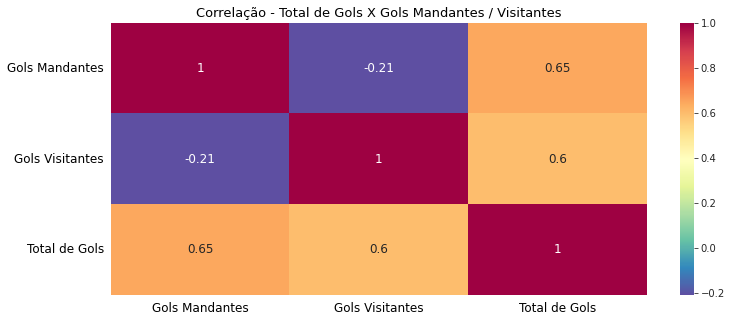

In [45]:
# Gráfico de heatmap para vermos o grau de correlação entre às variáveis de gols de times mandantes, visitantes
# e total de gols contábeis no campeonato inglês:

ax = sns.heatmap(data = df[['home_goals', 'away_goals', 'total_goals']].corr().round(2),
                 cmap = 'Spectral_r',
                 annot = True,
                 xticklabels = ['Gols Mandantes', 'Gols Visitantes', 'Total de Gols'],
                 yticklabels = ['Gols Mandantes', 'Gols Visitantes', 'Total de Gols'],
                 annot_kws = {'fontsize': 12})
ax.figure.set_size_inches(12, 5)
plt.xticks(color = 'k', fontsize = 12)
plt.yticks(color = 'k', fontsize = 12)
ax.set_title('Correlação - Total de Gols X Gols Mandantes / Visitantes', 
             fontsize = 13, color = 'k')
plt.show()

#### (8) Quais foram os times com os melhores ataques do campeonato inglês?

In [46]:
# Quantidade de gols marcados por times mandantes atribuídos à uma variável:

df_atack_home = df.groupby('hometeam').agg({'home_goals': 'sum'})

In [47]:
# Quantidade de gols marcados por times visitantes atribuídos à uma variável:

df_atack_away = df.groupby('awayteam').agg({'away_goals': 'sum'})

In [48]:
# Junção entre quantidade de gols de times mandantes e visitantes para termos um dataframe 
# de times que mais contabilizaram gols em ordem decrescente:

df_atack_team = df_atack_home.join(df_atack_away).assign(total_goals = df_atack_home.join(
    df_atack_away).home_goals + df_atack_home.join(
    df_atack_away).away_goals).drop(columns = ['home_goals', 'away_goals']).reset_index().rename(columns = {'hometeam': 'team'}).sort_values(
        'total_goals', ascending = False
    )

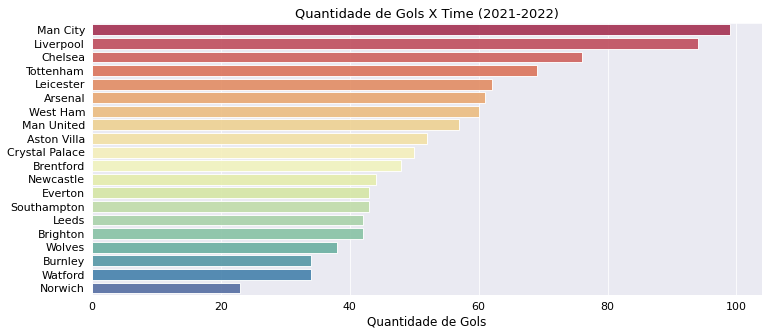

In [49]:
# Quantidade de gols marcados por cada time durante o campeonato inglês:

ax = sns.barplot(x = df_atack_team.total_goals, y = df_atack_team.team, palette = 'Spectral', alpha = 0.9)
ax.set_ylabel('')
ax.set_yticklabels(df_atack_team.team, fontsize = 11, color = 'k')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Quantidade de Gols', fontsize = 12, color = 'k')
ax.set_xticklabels(list(range(0, 101, 20)), fontsize = 11, color = 'k')
ax.set_title('Quantidade de Gols X Time (2021-2022)', fontsize = 13, color = 'k')
plt.show()

#### (9) Qual é a correlação entre quantidade de gols e quantidade de chutes?

In [50]:
# Quantidade de chutes realizados por times mandantes atribuídos à uma variável:

df_shot_home = df.groupby('hometeam').agg({'home_shots': 'sum'})

In [51]:
# Quantidade de chutes realizados por times visitantes atribuídos à uma variável:

df_shot_away = df.groupby('awayteam').agg({'away_shots': 'sum'})

In [52]:
# Junção entre quantidade de chutes contabilizados de times mandantes e visitantes para termos um dataframe 
# de times que mais contabilizaram chutes em ordem decrescente:

df_shots_team = df_shot_home.join(df_shot_away).assign(total_shots = df_shot_home.join(df_shot_away
                                                         ).home_shots + 
                                       df_shot_home.join(df_shot_away).away_shots).drop(
                                           columns = ['home_shots', 'away_shots']
                                       ).reset_index().rename(columns = {'hometeam': 'team'}).sort_values(
                                           'total_shots',
                                           ascending = False
                                       )

In [53]:
# Junção entre quantidade de chutes e quantidade de gols marcados por cada time:

df_atack_team = df_shots_team.merge(df_atack_team,
                    how = 'inner',
                    on = 'team')

In [54]:
# Visualização breve da correlação positiva entre quantidade de gols e quantidade de chutes:

print('Correlação - Quantidade de Gols X Quantidade de Chutes:',
      df_atack_team.total_shots.corr(df_atack_team.total_goals).round(2))

Correlação - Quantidade de Gols X Quantidade de Chutes: 0.88


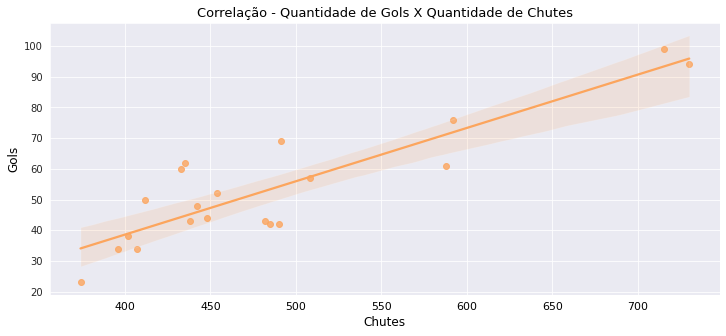

In [55]:
# Gráfico de scatterplot para vermos a correlação entre quantidade de gols e quantidade de chutes:

ax = sns.regplot(data = df_atack_team,
                 x = 'total_shots',
                 y = 'total_goals',
                 color = sns.color_palette('Spectral')[1])
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Chutes', fontsize = 12, color = 'k')
ax.set_ylabel('Gols', fontsize = 12, color = 'k')
ax.set_xticklabels([400, 400, 450, 500, 550, 600, 650, 700],
                   fontsize = 11, color = 'k')
ax.set_yticklabels([20, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_title('Correlação - Quantidade de Gols X Quantidade de Chutes', fontsize = 13, color = 'k')
plt.show()

#### (10) Quais são os times com às piores defesas do campeonato inglês?

In [56]:
# Total de gols sofridos por times mandantes:

df_home_goals_suffered = df.groupby('hometeam').agg({'away_goals': 'sum'})

In [57]:
# Total de gols sofridos por times visitantes:

df_away_goals_suffered = df.groupby('awayteam').agg({'home_goals': 'sum'})

In [58]:
# Total de gols sofridos por cada time:

df_goals_suffered = df_home_goals_suffered.join(df_away_goals_suffered).assign(total_goals_suffered = 
                                                           df_home_goals_suffered.join(
                                                               df_away_goals_suffered).home_goals +
                                                           df_home_goals_suffered.join(
                                                               df_away_goals_suffered).away_goals).drop(
                                                                   columns = ['away_goals',
                                                                              'home_goals']
                                                               ).reset_index().rename(columns = {'hometeam': 'team'}).sort_values(
                                                                   'total_goals_suffered', ascending = False
                                                               )

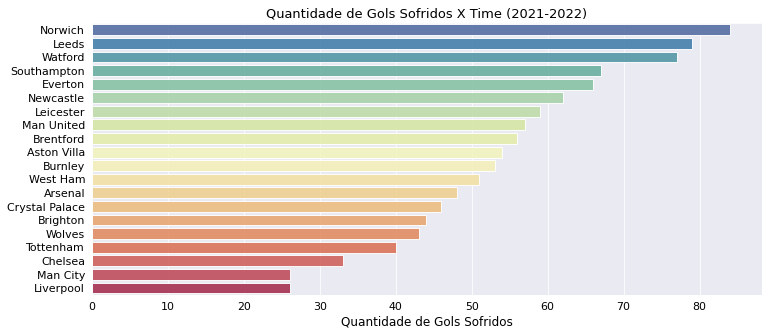

In [59]:
# Quantidade de gols sofridos por cada time:

ax = sns.barplot(x = df_goals_suffered.total_goals_suffered, y = df_goals_suffered.team, palette = 'Spectral_r', alpha = 0.9)
ax.set_ylabel('')
ax.set_yticklabels(df_goals_suffered.team, fontsize = 11, color = 'k')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Quantidade de Gols Sofridos', fontsize = 12, color = 'k')
ax.set_xticklabels(list(range(0, 81, 10)), fontsize = 11, color = 'k')
ax.set_title('Quantidade de Gols Sofridos X Time (2021-2022)', fontsize = 13, color = 'k')
plt.show()

#### (11) Qual é a correlação entre a quantidade de gols sofridos e a quantidade de faltas cometidas?

In [60]:
# Quantidade de faltas cometidas por cada time:

df_team_fouls = df.groupby('hometeam').agg({'home_fouls': 'sum'}).join(df.groupby('awayteam').agg({'away_fouls': 'sum'})).assign(total_fouls = 
  df.groupby('hometeam').agg({'home_fouls': 'sum'}).join(df.groupby('awayteam').agg({'away_fouls': 'sum'})).home_fouls +
  df.groupby('hometeam').agg({'home_fouls': 'sum'}).join(df.groupby('awayteam').agg({'away_fouls': 'sum'})).away_fouls  
).drop(columns = ['home_fouls', 'away_fouls']).reset_index().rename(columns = {'hometeam': 'team'}).sort_values(
    'total_fouls', ascending = False
)

In [61]:
# Correlação entre gols sofridos e faltas cometidas:

print('Correlação - Gols Sofridos X Faltas Cometidas: ', df_goals_suffered.merge(df_team_fouls, how = 'inner', on = 'team').total_goals_suffered.corr(
   df_goals_suffered.merge(df_team_fouls, how = 'inner', on = 'team').total_fouls
).round(2))

Correlação - Gols Sofridos X Faltas Cometidas:  0.42


In [62]:
# Junção entre a quantidade de gols sofridos e quantidade de faltas cometidas por cada time:

df_goals_suffered = df_goals_suffered.merge(df_team_fouls, how = 'inner', on = 'team')

In [63]:
# Visualização da quantidade de gols sofridos e quantidade de faltas cometidas por cada time:

df_goals_suffered

,team,total_goals_suffered,total_fouls
0,Norwich,84,356
1,Leeds,79,469
2,Watford,77,440
3,Southampton,67,402
4,Everton,66,368
5,Newcastle,62,391
6,Leicester,59,356
7,Man United,57,395
8,Brentford,56,371
9,Aston Villa,54,401


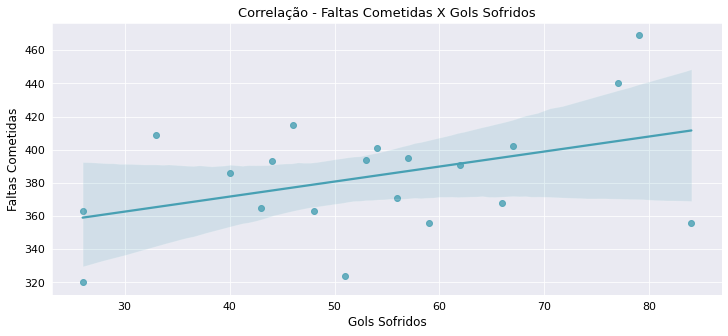

In [81]:
# Gráfico de scatterplot para vermos a correlação entre quantidade de gols e quantidade de chutes:

ax = sns.regplot(data = df_goals_suffered,
                 x = 'total_goals_suffered',
                 y = 'total_fouls',
                 color = sns.color_palette('Spectral')[5])
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Gols Sofridos', fontsize = 12, color = 'k')
ax.set_ylabel('Faltas Cometidas', fontsize = 12, color = 'k')
ax.set_xticklabels([30, 30, 40, 50, 60, 70, 80],
                 fontsize = 11, color = 'k')
ax.set_yticklabels([320, 320, 340, 360, 380, 400, 420, 440, 460], fontsize = 11, color = 'k')
ax.set_title('Correlação - Faltas Cometidas X Gols Sofridos', fontsize = 13, color = 'k')
plt.show()

#### (12) Traga insights informacionais sobre às demais variáveis não-analisadas.

In [65]:
# Verificação da quantidade de colunas do dataset:

df.shape[1]

21

In [66]:
# Mudança da configuração padrão da quantidade de colunas vísiveis, para podermos ver todas as colunas ao 
# usarmos a função df.head():

pd.set_option('max_column', 21)

In [67]:
# Correlação entre às demais variáveis não-avaliadas:

df[['home_goals', 'away_goals',  'home_shots',
    'away_shots', 'home_fouls', 'away_fouls',
    'home_corners', 'away_corners', 'home_yellow_cards',
    'away_yellow_cards', 'home_red_cards', 'away_red_cards', 'total_goals']].corr()

,home_goals,away_goals,home_shots,away_shots,home_fouls,away_fouls,home_corners,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,total_goals
home_goals,1.000000,-0.209398,0.398649,-0.279169,-0.084764,-0.022888,0.125710,-0.226944,-0.231188,-0.039143,-0.101611,0.119914,0.653575
away_goals,-0.209398,1.000000,-0.285164,0.421095,-0.019115,-0.007506,-0.150056,0.081803,0.083773,0.007851,0.174967,-0.157706,0.603225
home_shots,0.398649,-0.285164,1.000000,-0.518372,-0.070467,-0.053369,0.519120,-0.410650,-0.203000,0.002724,-0.135954,0.160075,0.104436
away_shots,-0.279169,0.421095,-0.518372,1.000000,-0.042322,-0.035185,-0.386344,0.557294,0.131434,-0.034277,0.173732,-0.199876,0.098231
home_fouls,-0.084764,-0.019115,-0.070467,-0.042322,1.000000,0.145590,-0.000419,-0.135338,0.376410,0.199383,0.093093,0.002119,-0.083933
away_fouls,-0.022888,-0.007506,-0.053369,-0.035185,0.145590,1.000000,-0.087862,-0.039238,0.103100,0.329915,-0.018510,0.088010,-0.024478
home_corners,0.125710,-0.150056,0.519120,-0.386344,-0.000419,-0.087862,1.000000,-0.314557,-0.060523,0.025085,-0.111507,0.105608,-0.013611
away_corners,-0.226944,0.081803,-0.410650,0.557294,-0.135338,-0.039238,-0.314557,1.000000,-0.011974,-0.090398,0.001678,-0.192884,-0.121790
home_yellow_cards,-0.231188,0.083773,-0.203000,0.131434,0.376410,0.103100,-0.060523,-0.011974,1.000000,0.254331,0.051051,0.002900,-0.123727
away_yellow_cards,-0.039143,0.007851,0.002724,-0.034277,0.199383,0.329915,0.025085,-0.090398,0.254331,1.000000,0.035880,-0.042892,-0.025850


In [68]:
# Quantidade de escanteios cobrados pelos times mandantes e visitantes: 

df_corners_team = df.groupby('hometeam').agg({'home_corners': 'sum'}).sort_values('home_corners',
                                                                ascending = False).join(
                                                                    df.groupby('awayteam').agg({'away_corners': 'sum'}).sort_values('away_corners',
                                                                ascending = False))

In [69]:
# Quantidade de escanteios cobrados por cada time:

df_corners = df_corners_team.assign(total_corners = df_corners_team['home_corners'] + 
                       df_corners_team['away_corners']).drop(columns = ['away_corners',
                                                                        'home_corners']).reset_index().rename(columns = {
                                                                            'hometeam': 'team'
                                                                        })

In [70]:
# Visualização da quantidade de escanteios cobrados por cada time:

df_corners

,team,total_corners
0,Man City,317
1,Liverpool,285
2,Chelsea,242
3,Arsenal,209
4,Brighton,202
5,Southampton,234
6,Tottenham,195
7,West Ham,191
8,Burnley,184
9,Norwich,165


In [71]:
# Quantidade de cartões amarelos e vermelhos recebidos por cada time mandante ou visitante:

df_cards_team = df.groupby('hometeam').agg({'home_yellow_cards': 'sum',
                            'home_red_cards': 'sum'}).sort_values(['home_yellow_cards', 
                                                                   'home_red_cards'], ascending = False).reset_index(
                                                                       
                                                                   ).rename(
                                                                       columns = {'hometeam': 'team'}
                                                                   ).merge(
     df.groupby('awayteam').agg({'away_yellow_cards': 'sum',
                            'away_red_cards': 'sum'}).sort_values(['away_yellow_cards', 
                                                                   'away_red_cards'], ascending = False).reset_index(
                                                                       
                                                    ).rename(
                                                          columns = {'awayteam': 'team'}
                                                                   )         
                                                                   , how = 'inner',
                                                                   on = 'team')

In [72]:
# Quantidade de cartões amarelos e vermelhos recebidos por cada time: 

df_cards_team = df_cards_team.assign(total_yellow_cards = df_cards_team.home_yellow_cards + df_cards_team.away_yellow_cards,
                     total_red_cards = df_cards_team.home_red_cards + df_cards_team.away_red_cards).drop(
                         columns = ['home_yellow_cards', 'home_red_cards', 
                                    'away_yellow_cards','away_red_cards']
                     )

In [73]:
df_goals_suffered.merge(df_cards_team, how = 'inner', on = 'team').corr()

,total_goals_suffered,total_fouls,total_yellow_cards,total_red_cards
total_goals_suffered,1.000000,0.415040,0.424727,0.435823
total_fouls,0.415040,1.000000,0.740664,0.011540
total_yellow_cards,0.424727,0.740664,1.000000,0.231613
total_red_cards,0.435823,0.011540,0.231613,1.000000


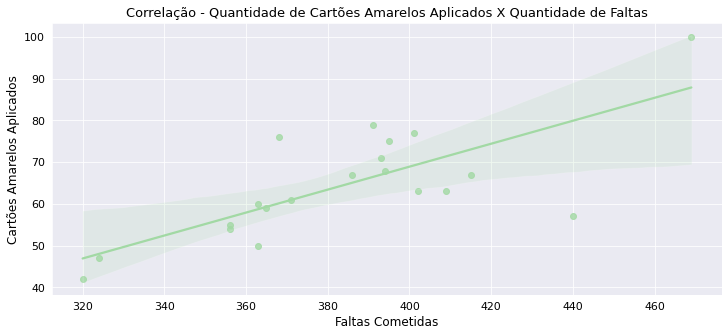

In [74]:
# Gráfico de scatterplot para vermos a correlação entre quantidade de faltas cometidas e quantidade de
# cartões amarelos aplicados:

ax = sns.regplot(data = df_goals_suffered.merge(df_cards_team, how = 'inner', on = 'team'),
                 x = 'total_fouls',
                 y = 'total_yellow_cards',
                 color = sns.color_palette('Spectral')[4])
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Faltas Cometidas', fontsize = 12, color = 'k')
ax.set_ylabel('Cartões Amarelos Aplicados', fontsize = 12, color = 'k')
ax.set_xticklabels([320, 320, 340, 360, 380, 400, 420, 440, 460],
                 fontsize = 11, color = 'k')
ax.set_yticklabels([40, 40, 50, 60, 70, 80, 90, 100], fontsize = 11, color = 'k')
ax.set_title('Correlação - Quantidade de Cartões Amarelos Aplicados X Quantidade de Faltas', fontsize = 13, color = 'k')
plt.show()

## ANÁLISE EXPLORATÓRIA FINALIZADA.